In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import infercnvpy as cnv
import pandas as pd
from matplotlib import rcParams

In [2]:
adata = sc.read('/home/gabrielarapozo/sc_breast/data/colab_ufv/02_object/melanoma.h5ad')
adata = adata.raw.to_adata()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [3]:
cnv.io.genomic_position_from_gtf("/databases/H_sapiens/Ensembl/GRCh38/gtf/Homo_sapiens.GRCh38.83.gtf", adata=adata, gtf_gene_id='gene_name', inplace=True)
adata.var['chromosome'] = ['chr'+str(i) for i in adata.var['chromosome']]
adata.var['chromosome'].value_counts()

/data04/projects04/MarianaBoroni/lbbc_members/lib/conda_envs/sc_breast/lib/python3.8/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
/data04/projects04/MarianaBoroni/lbbc_members/lib/conda_envs/sc_breast/lib/python3.8/site-packages/gtfparse/read_gtf.py:151: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  result = parse_gtf(
INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name']


chrnan    2162
chr1      2158
chr19     1496
chr11     1338
chr2      1338
chr17     1277
chr3      1172
chr6      1109
chr12     1071
chr7       998
chrX       931
chr5       928
chr16      859
chr9       837
chr10      816
chr4       802
chr14      739
chr8       737
chr15      726
chr20      599
chr22      494
chr13      436
chr18      296
chr21      269
chrY        98
Name: chromosome, dtype: int64

In [4]:
cnv.tl.infercnv(
    adata,
    reference_key="celltype",
    reference_cat=["CD8 T", "Myeloid",'Plasma B Cell', 
    'CD4 T', 'NK', 'pDC', 'Fibroblasts', 'Folicular B Cell'],
    window_size=250)

  0%|          | 0/2 [00:00<?, ?it/s]

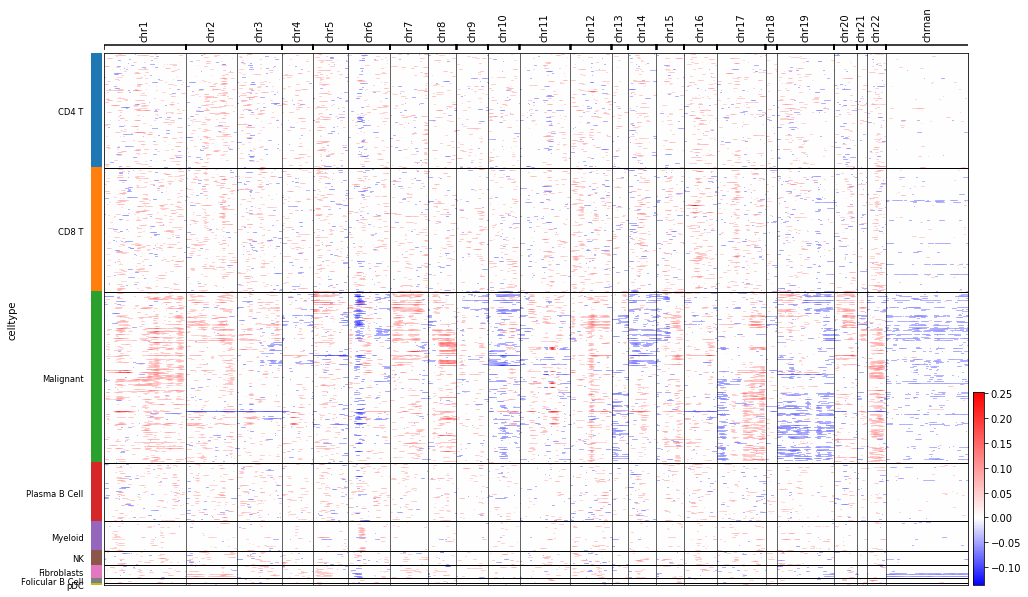

In [5]:
cnv.pl.chromosome_heatmap(adata, groupby="celltype")

In [6]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

In [7]:
cnv.tl.cnv_score(adata)

/data04/projects04/MarianaBoroni/lbbc_members/lib/conda_envs/sc_breast/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'chromosome' as categorical
/data04/projects04/MarianaBoroni/lbbc_members/lib/conda_envs/sc_breast/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'gene_id' as categorical
/data04/projects04/MarianaBoroni/lbbc_members/lib/conda_envs/sc_breast/lib/python3.8/site-packages/anndata/_core/anndata.py:1

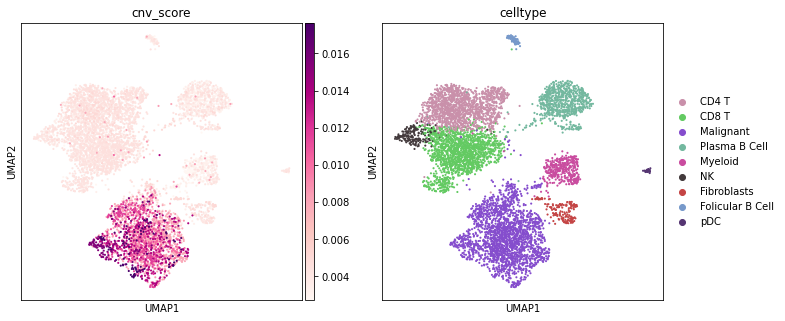

In [8]:
rcParams['figure.figsize'] = 5,5
sc.pl.umap(adata, color=['cnv_score', 'celltype'], ncols=2, cmap='RdPu')

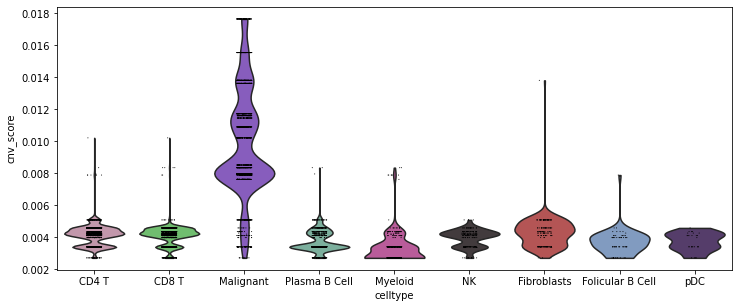

In [9]:
rcParams['figure.figsize'] = 10,5
sc.pl.violin(adata,'cnv_score',  groupby= 'celltype')

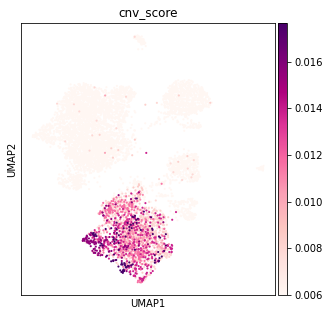

In [15]:
rcParams['figure.figsize'] = 5,5
sc.pl.umap(adata, color=['cnv_score'], ncols=2, cmap='RdPu', vmin=0.006)

In [16]:
adata.write("/home/gabrielarapozo/sc_breast/data/colab_ufv/02_object/integration_inferCNV.h5ad")